# Graph

In this tutorial we introduce the notion of `MultiLayerGraph`, how to construct and manipulate it.

`MultiLayerGraph` is made of two component, the `graph` and the `roads`. The first one is an multi layer oriented graph represensting the all the mobility services and their connections inside one connected graph, the second one is a physical descriptions of the roads inside your network.

## Create a simple RoadDescriptor

### Instantiation

In [1]:
from mnms.graph.road import RoadDescriptor

roads = RoadDescriptor()
roads

### Registering nodes

In [2]:
roads.register_node('IN', [-50, 0])
roads.register_node('0', [0, 0])
roads.register_node('1', [100, 0])
roads.register_node('2', [100, 100])
roads.register_node('3', [0, 100])
roads.register_node('OUT', [150, 100]) 

roads.nodes

{'IN': array([-50,   0]),
 '0': array([0, 0]),
 '1': array([100,   0]),
 '2': array([100, 100]),
 '3': array([  0, 100]),
 'OUT': array([150, 100])}

### Registering sections

In [3]:
roads.register_section('IN_0', 'IN', '0')
roads.register_section('0_1', '0', '1')
roads.register_section('1_2', '1', '2')
roads.register_section('0_3', '0', '3')
roads.register_section('3_2', '3', '2')
roads.register_section('2_OUT', '2', 'OUT')

roads.sections

{'IN_0': {'upstream': 'IN', 'downstream': '0', 'length': 50.0, 'zone': None},
 '0_1': {'upstream': '0', 'downstream': '1', 'length': 100.0, 'zone': None},
 '1_2': {'upstream': '1', 'downstream': '2', 'length': 100.0, 'zone': None},
 '0_3': {'upstream': '0', 'downstream': '3', 'length': 100.0, 'zone': None},
 '3_2': {'upstream': '3', 'downstream': '2', 'length': 100.0, 'zone': None},
 '2_OUT': {'upstream': '2', 'downstream': 'OUT', 'length': 50.0, 'zone': None}}

### Registering stops

In [4]:
roads.register_stop('S0', 'IN_0', 0.4)
roads.register_stop('S1', '3_2', 0.75)


roads.stops

{'S0': {'section': 'IN_0',
  'relative_position': 0.4,
  'absolute_position': array([-30.,   0.])},
 'S1': {'section': '3_2',
  'relative_position': 0.75,
  'absolute_position': array([ 75., 100.])}}

### Rendering

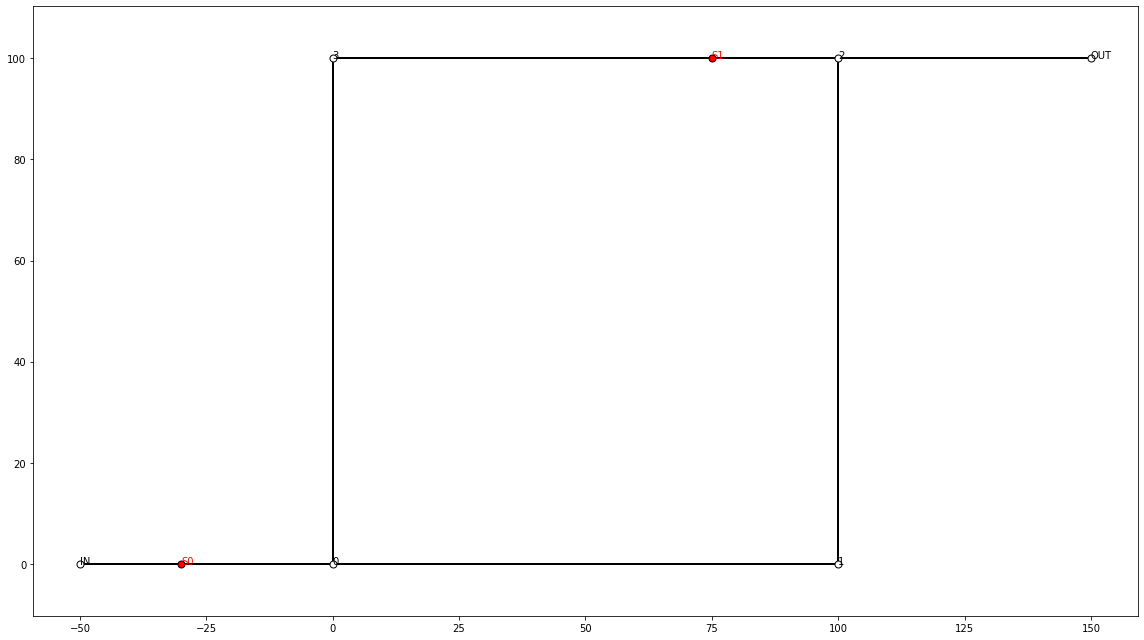

In [5]:
from mnms.tools.render import draw_roads
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 9))
draw_roads(ax, roads, nodesize=7, linkwidth=2, label_size=10)

## Add Layer and mobility services

A Layer of the mobility graph is associated to a type of Vehicle, mobility services are associated to a layer. The Layer is a graph representation and the mobility service contains the logic for managing a fleet of Vehicle.

### Car layer with a personal car mobility service

In [10]:
from mnms.graph.layers import CarLayer
from mnms.mobility_service.car import PersonalCarMobilityService

SPEED_CAR = 10

car = CarLayer(roads,
               default_speed=SPEED_CAR,
               services=[PersonalCarMobilityService()])

car.create_node('CIN', 'IN')
car.create_node('C0', '0')
car.create_node('C1', '1')
car.create_node('C2', '2')
car.create_node('COUT', 'OUT')

car.create_link('CIN_C0', 'CIN', 'C0', {'travel_time':0.5/SPEED_CAR}, ['IN_0'])
car.create_link('C0_C1', 'C0', 'C1', {'travel_time':1/SPEED_CAR}, ['0_1'])
car.create_link('C1_C2', 'C1', 'C2', {'travel_time':1/SPEED_CAR}, ['1_2'])
car.create_link('C2_COUT', 'C2', 'COUT', {'travel_time':0.5/SPEED_CAR}, ['2_OUT'])

car.mobility_services

{'PersonalCar': <mnms.mobility_service.car.PersonalCarMobilityService at 0x7f4cb57a67a0>}

### Bus layer with a public transportmobility service

In [2]:
# from mnms.graph.layers import BusMobilityGraphLayer
# from mnms.mobility_service.public_transport import PublicTransportMobilityService
# from mnms.tools.time import TimeTable, Dt

# SPEED_BUS = 5

# bus = BusMobilityGraphLayer('BusLayer',
#                             SPEED_BUS,
#                             services=[PublicTransportMobilityService('Bus')])

# bus_line = bus.add_line('L1', TimeTable.create_table_freq('07:00:00', '18:00:00', Dt(minutes=10)))

# bus_line.add_stop('BIN', 'IN')
# bus_line.add_stop('B0', '0')
# bus_line.add_stop('B3', '3')
# bus_line.add_stop('B2', '2')
# bus_line.add_stop('BOUT', 'OUT')

# bus_line.connect_stops('BIN_B0', 'BIN', 'B0', 0.5, ['IN_0'], {'travel_time':0.5/SPEED_BUS})
# bus_line.connect_stops('B0_B3', 'B0', 'B3', 1, ['0_3'], {'travel_time':1/SPEED_BUS})
# bus_line.connect_stops('B3_B2', 'B3', 'B2', 1, ['3_2'], {'travel_time':1/SPEED_BUS})
# bus_line.connect_stops('B2_COUT', 'B2', 'BOUT', 0.5, ['2_OUT'], {'travel_time':0.5/SPEED_BUS})

# bus.mobility_services

ImportError: cannot import name 'BusMobilityGraphLayer' from 'mnms.graph.layers' (/home/florian/Work/UGE/MnMS/src/mnms/graph/layers.py)

### Add the mobility services to the MultiModalGraph

Then we add the two mobility services to the `MultiModalGraph`. And check that there is no duplicate in the nodes and links.

In [ ]:
# mmgraph.add_layer(car)
# mmgraph.add_layer(bus)
# mmgraph.mobility_graph.check()

# mmgraph.layers

### Rendering the mobility services

In [ ]:
# from mnms.tools.render import draw_multimodal_graph

# fig, ax = plt.subplots(figsize=(16, 9))
# draw_multimodal_graph(ax, mmgraph, nodesize=5, linkwidth=2, dy=50)

## Compute shortest path

To compute a shortest path, we define a `User` with an origin/destination and a departure time. The shortest path algorithm use the dictionary of cost define on links. We use the `time` cost previously define.

In [ ]:
# from mnms.graph.shortest_path import compute_shortest_path
# from mnms.demand.user import User
# from mnms.tools.time import Time

# user = User('U0', 'IN', 'OUT', Time('07:00:00'), available_mobility_services=['PersonalCar'])
# path = compute_shortest_path(mmgraph, user)
# print(f"Path cost: {path.path_cost}, path:{path.nodes}") 

## Save graph

You can save the `MultiModalGraph` in a json format using the `io` module.

In [ ]:
# from mnms.graph.io import save_graph

# save_graph(mmgraph, 'results/mmgraph.json')

And reload it using the `load_graph` function:

In [ ]:
# from mnms.graph.io import load_graph

# new_mmgraph = load_graph('results/mmgraph.json')

# fig, ax = plt.subplots(figsize=(16, 9))
# draw_multimodal_graph(ax, new_mmgraph, nodesize=5, linkwidth=2, dy=50)